<a href="https://colab.research.google.com/github/williamvnobrega/challenge_telecomx_parte_II/blob/main/challenge_telecomx_parte_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠️ Preparação dos Dados

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/df_limpo.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [36]:
df = df.drop(columns=['customerID'])

In [37]:
df_clean = df.copy()


cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')


categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)


df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [38]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

In [39]:
df.isna().sum()

,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0


In [40]:
df_encoded = df_encoded.dropna(subset = ['Total.Day','account.Charges.Total'])

In [41]:
df_encoded.isna().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


## 🎯 Correlação e Seleção de Variáveis

In [42]:
df_encoded['Churn_Yes'].value_counts(normalize=True)

,proportion
Churn_Yes,
False,0.734215
True,0.265785


In [43]:
corr = df_encoded.corr()

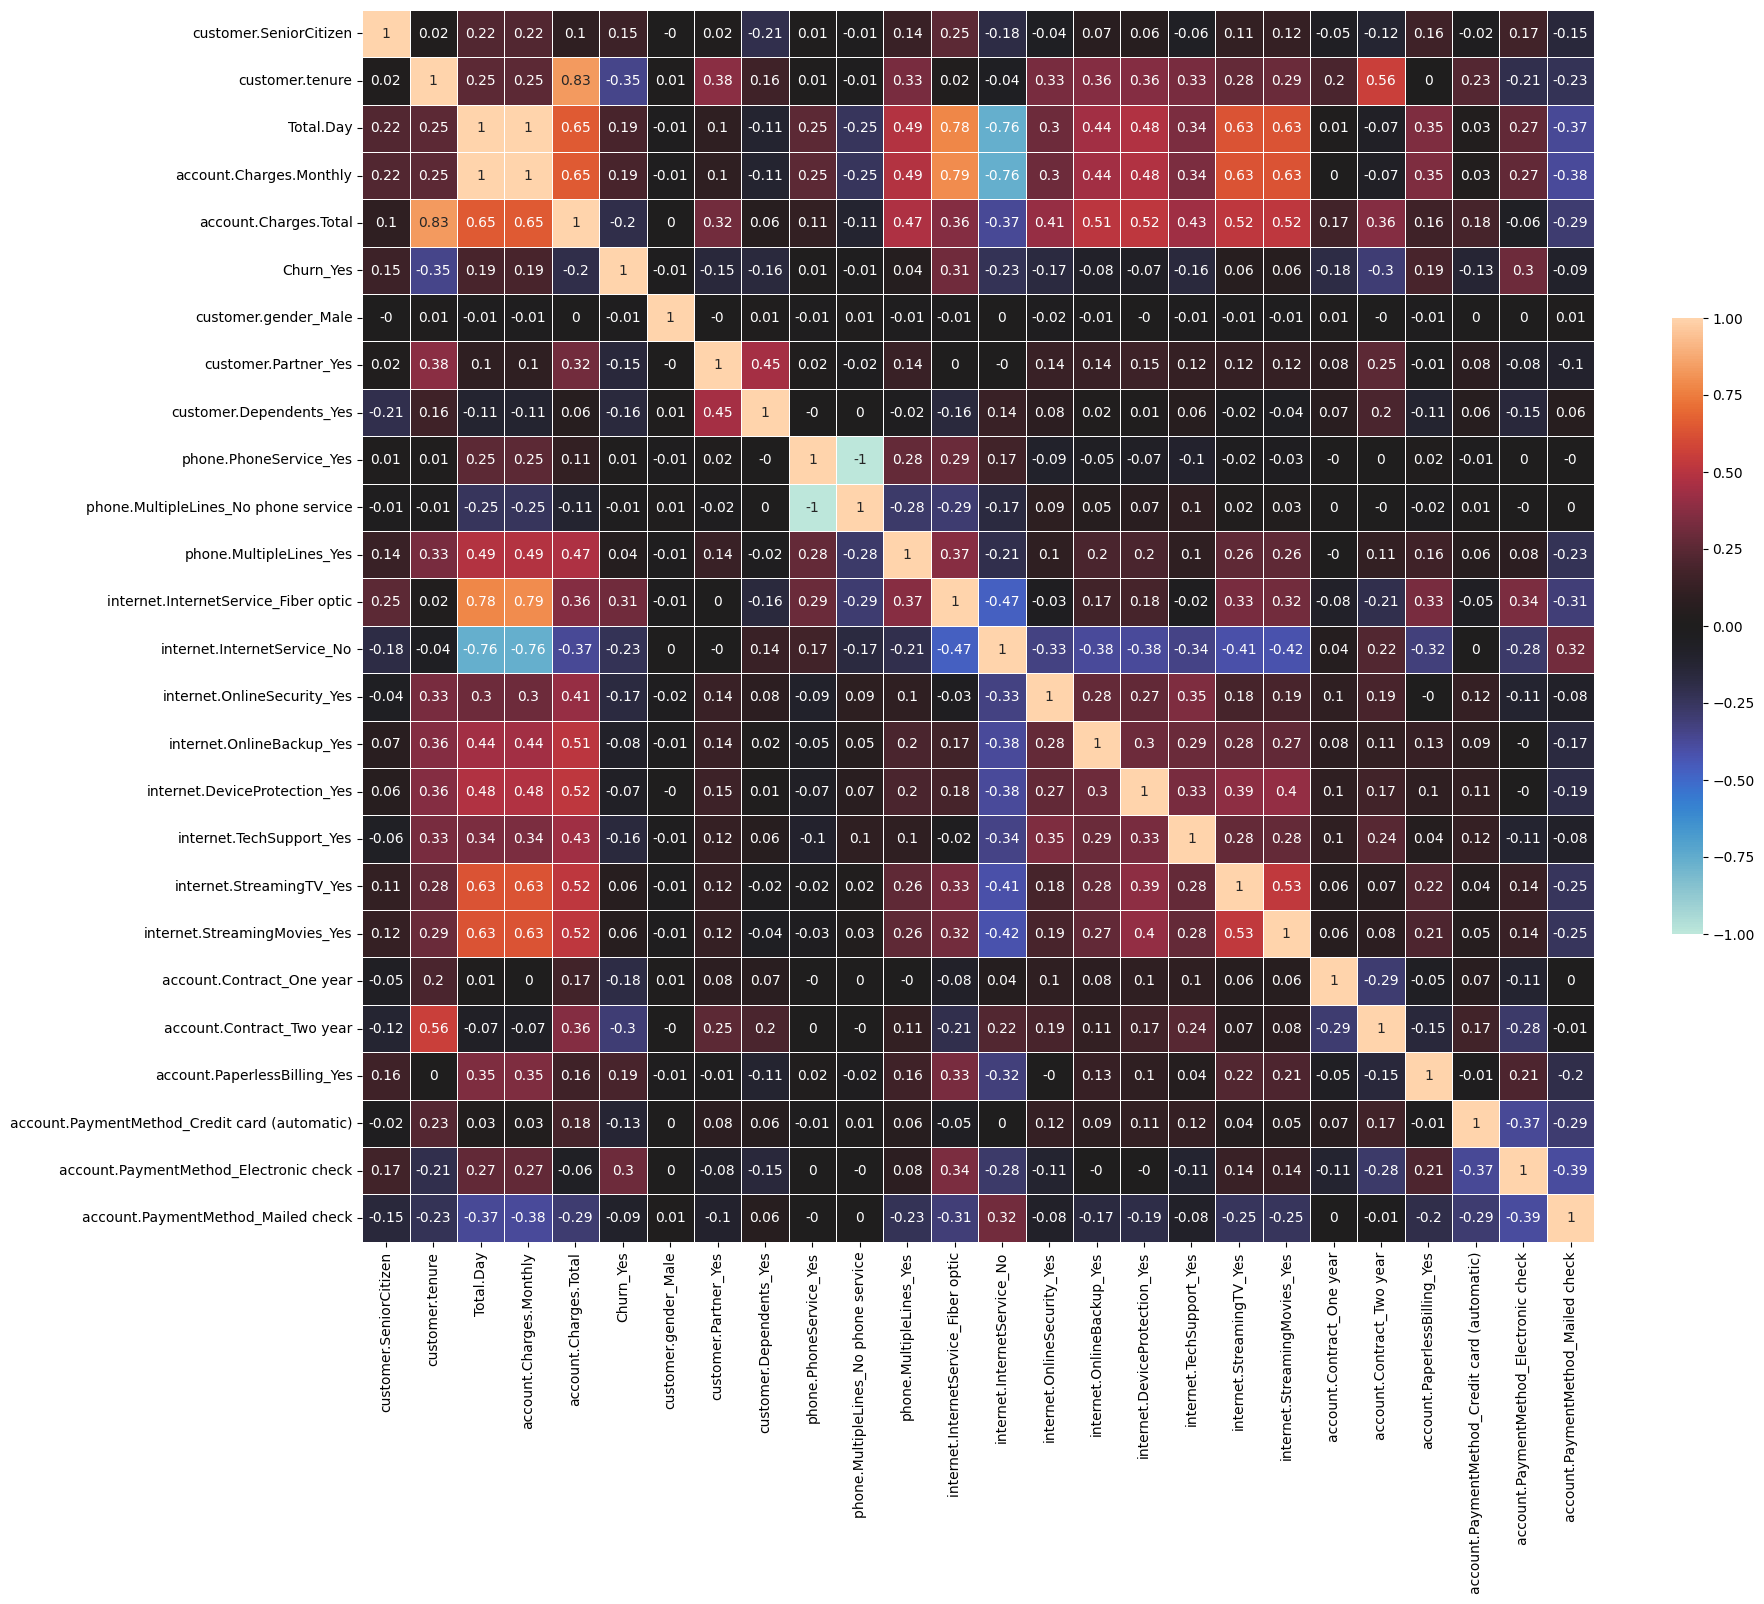

In [44]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

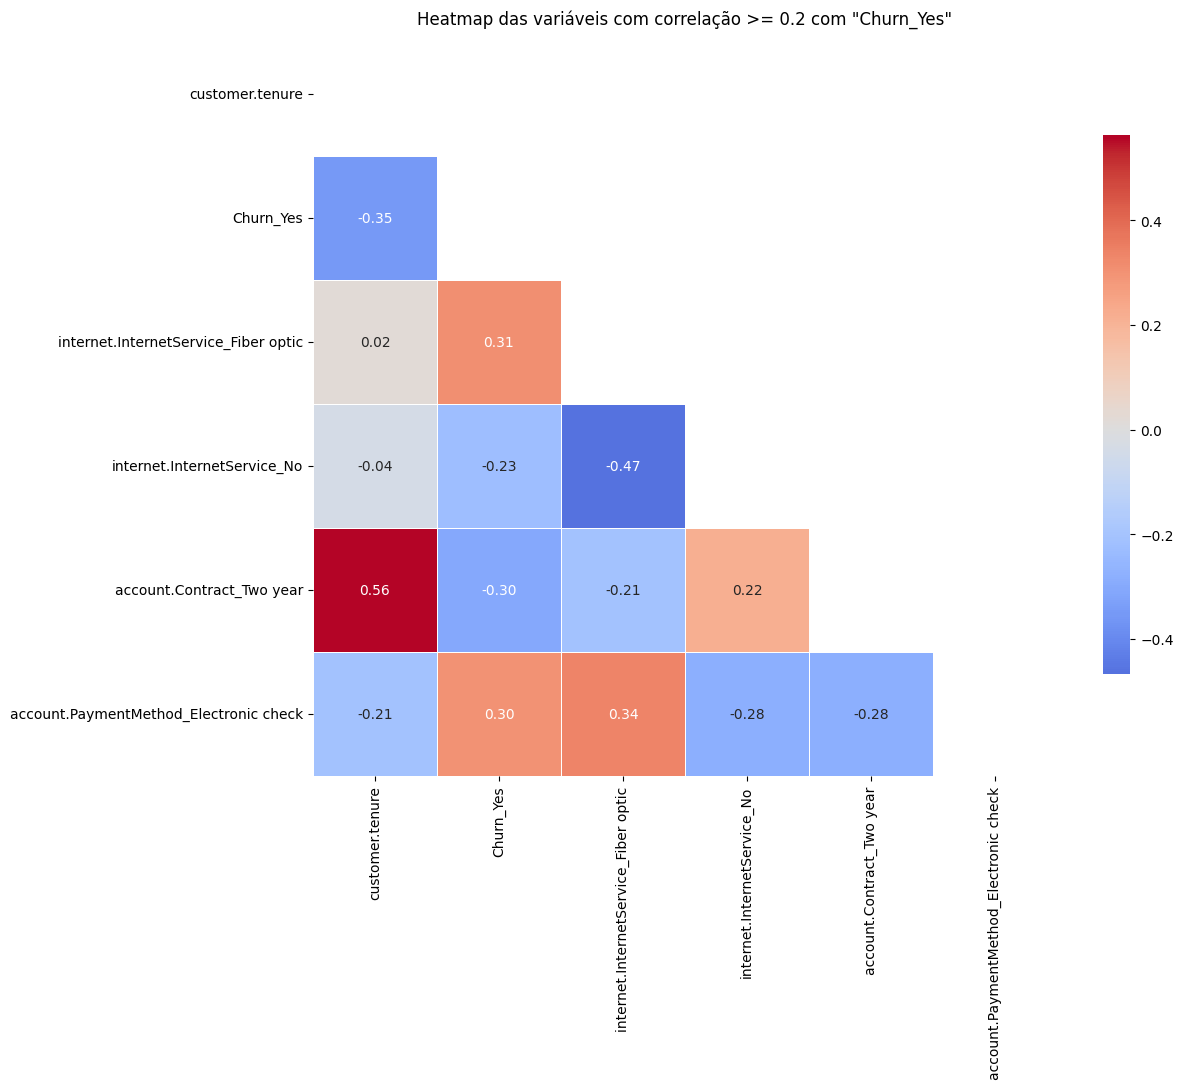

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns



target_var = 'Churn_Yes'


limiar = 0.2


variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()


if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)


corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]


mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))


plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

🔍 Análise de Multicolinearidade

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm



X = df_encoded.drop(columns=['Churn_Yes'])
X_const = add_constant(X)
X_const = X_const.astype(float)
X_filtered = X_const.copy()


cols_to_drop = [
    "phone.PhoneService_Yes",
    "phone.MultipleLines_No phone service"
]

X_filtered.drop(columns=cols_to_drop, inplace=True)

X_filtered.drop(columns=["Total.Day"], inplace=True)



X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)


X_filtered = X_filtered.astype(float)


vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]


display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


In [47]:
X_final = X_filtered.drop(columns=["account.Charges.Total"])

vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


In [48]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7032 non-null   int64  
 1   customer.tenure                                7032 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7032 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7032 non-null   bool   
 6   customer.gender_Male                           7032 non-null   bool   
 7   customer.Partner_Yes                           7032 non-null   bool   
 8   customer.Dependents_Yes                        7032 non-null   bool   
 9   phone.PhoneService_Yes                         7032 non-n

In [49]:
import plotly.express as px
px.box(df_encoded,x='customer.tenure', color = 'Churn_Yes')


In [50]:
px.box(df_encoded,x='account.Charges.Total', color = 'Churn_Yes')

## 🤖 Modelos Preditivos

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [52]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [56]:
# Regressão Logística
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)


y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



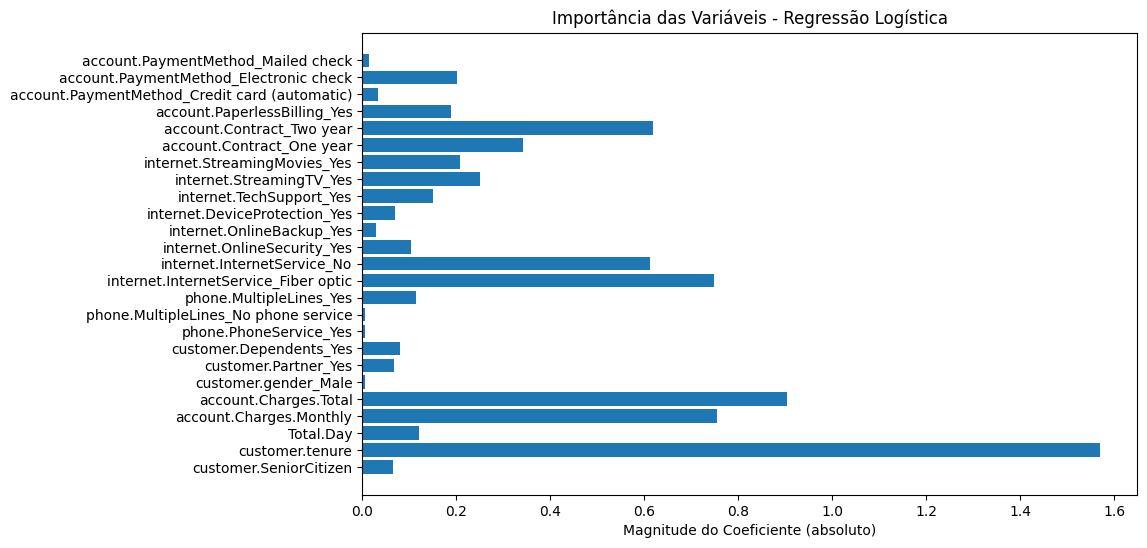

In [124]:
# Importância das Variáveis - Regressão Logística
coefs = abs(lr.coef_[0])
features = X_train.columns


plt.figure(figsize=(10, 6))
plt.barh(features, coefs)
plt.title("Importância das Variáveis - Regressão Logística")
plt.xlabel("Magnitude do Coeficiente (absoluto)")
plt.show()

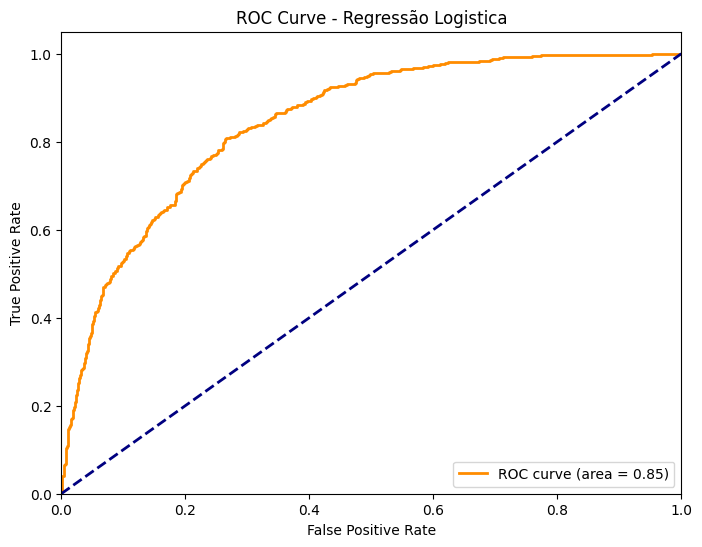

In [131]:
from sklearn.metrics import roc_curve, auc


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)


plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Regressão Logistica')
plt.legend(loc="lower right")
plt.show()

In [57]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)


y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusão:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



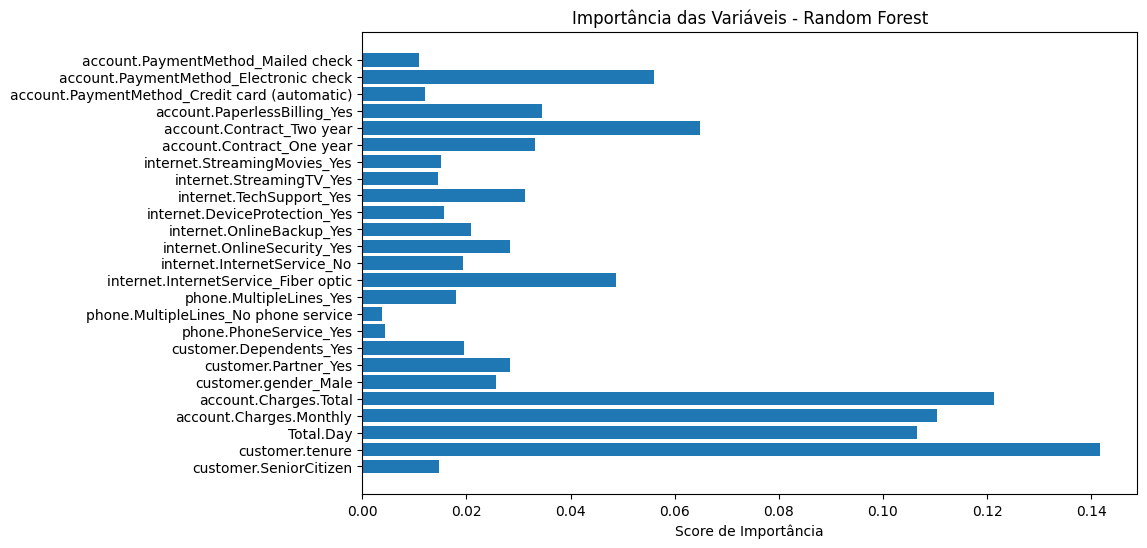

In [123]:
#Importância das Variáveis - Random Forest

importances = rf.feature_importances_
features = X_train.columns


plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Score de Importância")
plt.show()

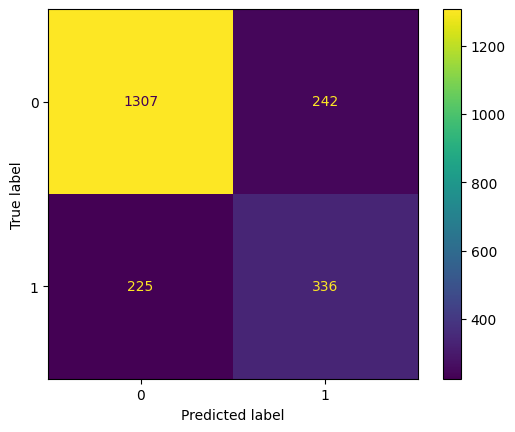

In [68]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()

In [132]:
# Modelo KNN

knn = KNeighborsClassifier(n_neighbors= 3, metric= 'manhattan',weights='uniform')
knn.fit(X_train_bal, y_train_bal)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [99]:
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

In [100]:
# Avaliação

print("\nK-Nearest Neighbors (KNN)")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN)
Acurácia: 0.7113744075829384
ROC AUC: 0.737141091544312
Matriz de Confusão:
 [[1148  401]
 [ 208  353]]
              precision    recall  f1-score   support

       False       0.85      0.74      0.79      1549
        True       0.47      0.63      0.54       561

    accuracy                           0.71      2110
   macro avg       0.66      0.69      0.66      2110
weighted avg       0.75      0.71      0.72      2110



In [97]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train_bal, y_train_bal)
print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 3}


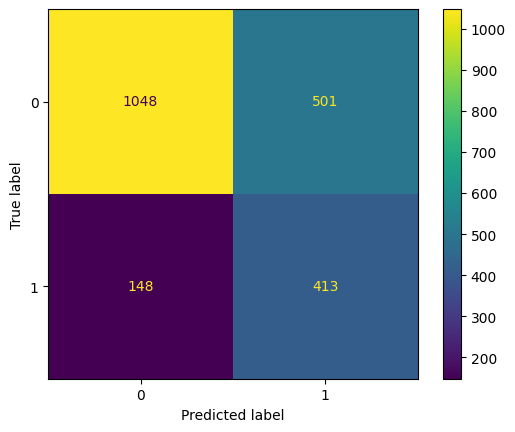

In [69]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn).plot();

In [121]:
# Modelo XGB
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [109]:
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

In [118]:
# Avaliação

print("\nXGB")
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGB
Acurácia: 0.7758293838862559
ROC AUC: 0.8144412645039235
Matriz de Confusão:
 [[1309  240]
 [ 233  328]]
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1549
        True       0.58      0.58      0.58       561

    accuracy                           0.78      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110



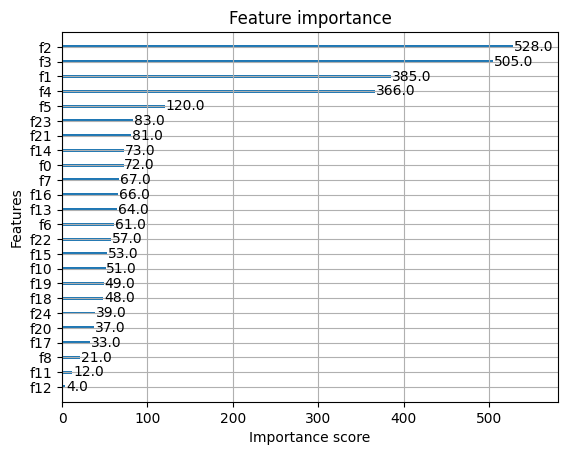

In [119]:
#Importância das Variáveis
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

In [130]:

feature_names = df_encoded.drop(columns=['Churn_Yes']).columns.tolist()


importance = xgb.feature_importances_


importance_df_xgb = pd.DataFrame({'Feature': [f'f{i}' for i in range(len(importance))],
                                  'Importance': importance})



feature_mapping = {f'f{i}': name for i, name in enumerate(feature_names)}


importance_df_xgb['Feature'] = importance_df_xgb['Feature'].map(feature_mapping)
print(importance_df_xgb.sort_values('Importance', ascending=False))

                                          Feature  Importance
20                      account.Contract_Two year    0.264967
11           internet.InternetService_Fiber optic    0.192996
19                      account.Contract_One year    0.129042
12                    internet.InternetService_No    0.086669
18                   internet.StreamingMovies_Yes    0.034414
17                       internet.StreamingTV_Yes    0.024895
6                            customer.Partner_Yes    0.022735
21                   account.PaperlessBilling_Yes    0.021655
16                       internet.TechSupport_Yes    0.021602
23         account.PaymentMethod_Electronic check    0.020936
8                          phone.PhoneService_Yes    0.018493
14                      internet.OnlineBackup_Yes    0.017793
10                        phone.MultipleLines_Yes    0.017770
13                    internet.OnlineSecurity_Yes    0.016963
15                  internet.DeviceProtection_Yes    0.015865
5       

# 📋 **Interpretação e Conclusões**

### **Introdução**

Este relatório tem como objetivo analisar através dos resultados obtidos pelos modelos preditivos (**Regressão Logística, Random Forest, KNN, XGBoost**) fatores que motivam a evasão de clientes, a fim de identificar as variáveis mais relevantes para rotatividade (*churn*) de clientes e assim propor estratégias de retenção com base nas descobertas obtidas.

**Desempenho dos Modelos**

|Modelo   | Acurácia  | ROC AUC  | Precision (True)  | Recall (True)  | F1 score (True)  |
|---|---|---|---|---|---|
| Regressão Logística  | 0.750  | 0.845  | 0.52  | 0.81  | 0.63  |
| Random Forest  | 0.779  | 0.824  | 	0.58  | 0.60  | 0.59  |
| KNN  |  0.711 | 0.737  |  0.47 |  	0.63 | 0.54  |
| XGBoost  | 0.776 | 0.814  | 0.58  |  0.58 | 0.58  |

* O modelo de Random Forest apresentou melhor acurácia geral (*77.9%*)
* O modelo de Regressão Logística obteve o melhor desempenho em ROC AUC (84.5%), indicando melhor capacidade de distinguir entre clientes que evadem e que permanecem




**Variáveis Mais Influentes**

1. Tipo de Contrato
   * account.Contract_Two year  
   * account.Contract_One year
     * Cliente com contratos de longo prazo têm menor probabilidade de evasão
2. Serviço de Internet
 * internet.InternetService_Fiber optic
 * internet.InternetService_No
3. Fatura Digital
  * account.PaperlessBilling_Yes
4. Serviços Adicionais
 * StreamingMovies_Yes
 * StreamingTV_Yes
 * TechSupport_Yes
5. Tempo como Cliente
  * customer.tenure
6. Método de Pagamento
  * PaymentMethod_Electronic check
    * Formas de pagamento automáticas parecem reduzir a evasão

**Estratégias de Retenção de Clientes**

A partir das análises a principal recomendação é promover contratos de maior prazo, ofertando descontos ou benefícios adicionais para os clientes que optem por planos anuais ou bienais, tendo em vista que foi a variável determinante nas previsões dos modelos. Promover a personalização de pacotes adicionais tendo em vista que clientes que possuem múltiplos serviços tendem a permanecer por mais tempo. <p> Já em relação aos meios de cobrança estimular pagamentos automáticos por cartão de crédito aos invés da utilização de cheques eletrônicos, pois esta variável mostrou-se relevante para retenção de clientes. Por fim, conceder alternativas para clientes que não possuem plano de internet pode melhorar a experiência desse grupo de clientes por falta de opções atraentes.